<a href="https://colab.research.google.com/github/ssobranding/mypage/blob/main/WEEK_3_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK THREE: Data Understanding

## EXERCISE #1
You will be given the problem statement and some initial data. It is your job to investigate the data to consider the following:



*   Does the data match the business scenario described?
*   Are there any elements of the data that are surprising/confusing?
*   What questions would you have for the company?
*   Note: you do not need to do any modelling of the data at this stage!


In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving Projects.xlsx to Projects (2).xlsx


In [ ]:
df = pd.read_excel("Projects.xlsx", sheet_name="Activities")
df.head()

,Project,Template,Task,Region,Team,Assigned,Accepted,Started,Completed
0,AEP74IBQ3VM,WPN,Project planning,East,PM,2022-11-01,2022-11-01 00:00:00,2022-11-01 00:00:00,2022-11-01 00:00:00
1,AEP74IBQ3VM,WPN,DNS regisitration,East,DNS,2022-11-01,2022-11-01 00:00:00,2022-11-02 00:00:00,2022-11-02 00:00:00
2,AEP74IBQ3VM,WPN,Server specifications,East,SA,2022-11-01,2022-11-01 00:00:00,2022-11-02 00:00:00,2022-11-02 00:00:00
3,AEP74IBQ3VM,WPN,Hardware purchase,East,ACCT,2022-11-02,2022-11-03 00:00:00,2022-11-07 00:00:00,2022-11-07 00:00:00
4,AEP74IBQ3VM,WPN,Hardware configuration,East,SE,2022-11-07,2022-11-08 00:00:00,2022-11-08 00:00:00,2022-11-08 00:00:00


Let's convert date columns to datetime items:

In [ ]:
dates = ['Assigned', 'Accepted', 'Started', 'Completed']

for date in dates:
  df[date] = pd.to_datetime(df[date])

DateParseError: year 0 is out of range: 00/00/0000, at position 89

OK errors because of missing values. Let's try this:

In [ ]:
for date in dates:
  # we use errors='coerce' to try to force anything that looks like a date to a date
  # we use fillna(pd.NaT) to fill anything else with a NULL date value
  df[date] = pd.to_datetime(df[date], errors='coerce').fillna(pd.NaT)

df.head()

,Project,Template,Task,Region,Team,Assigned,Accepted,Started,Completed
0,AEP74IBQ3VM,WPN,Project planning,East,PM,2022-11-01,2022-11-01,2022-11-01,2022-11-01
1,AEP74IBQ3VM,WPN,DNS regisitration,East,DNS,2022-11-01,2022-11-01,2022-11-02,2022-11-02
2,AEP74IBQ3VM,WPN,Server specifications,East,SA,2022-11-01,2022-11-01,2022-11-02,2022-11-02
3,AEP74IBQ3VM,WPN,Hardware purchase,East,ACCT,2022-11-02,2022-11-03,2022-11-07,2022-11-07
4,AEP74IBQ3VM,WPN,Hardware configuration,East,SE,2022-11-07,2022-11-08,2022-11-08,2022-11-08


The code here tells Pandas to try to force ('coerce') anything that seems like its a date into a date, and if it fails to fill with _NULL_ ('fillna(pd.NaT)').

Now we can calculate some time deltas:

In [ ]:
df['s1_to_s2'] = df['Accepted'] - df['Assigned']
df['s2_to_s3'] = df['Started'] - df['Accepted']
df['s3_to_s4'] = df['Completed'] - df['Started']
df['s1_to_s4'] = df['Completed'] - df['Assigned']

df.head()

,Project,Template,Task,Region,Team,Assigned,Accepted,Started,Completed,s1_to_s2,s2_to_s3,s3_to_s4,s1_to_s4
0,AEP74IBQ3VM,WPN,Project planning,East,PM,2022-11-01,2022-11-01,2022-11-01,2022-11-01,0 days,0 days,0 days,0 days
1,AEP74IBQ3VM,WPN,DNS regisitration,East,DNS,2022-11-01,2022-11-01,2022-11-02,2022-11-02,0 days,1 days,0 days,1 days
2,AEP74IBQ3VM,WPN,Server specifications,East,SA,2022-11-01,2022-11-01,2022-11-02,2022-11-02,0 days,1 days,0 days,1 days
3,AEP74IBQ3VM,WPN,Hardware purchase,East,ACCT,2022-11-02,2022-11-03,2022-11-07,2022-11-07,1 days,4 days,0 days,5 days
4,AEP74IBQ3VM,WPN,Hardware configuration,East,SE,2022-11-07,2022-11-08,2022-11-08,2022-11-08,1 days,0 days,0 days,1 days


Now we can summarise these times:

In [ ]:
deltas = ['s1_to_s2', 's2_to_s3', 's3_to_s4', 's1_to_s4']

for delta in deltas:
  print(delta)
  print(f'Avg: {df[delta].mean()}')
  print(f'Median: {df[delta].median()}')
  print(f'Std: {df[delta].std()}')
  print(f'Min: {df[delta].min()}')
  print(f'Max: {df[delta].max()}')
  print("\n")

s1_to_s2
Avg: 0 days 05:36:10.472727272
Median: 0 days 00:00:00
Std: 1 days 00:44:43.806218922
Min: -1 days +00:00:00
Max: 3 days 00:00:00


s2_to_s3
Avg: 0 days 15:25:59.330259645
Median: 1 days 00:00:00
Std: 0 days 16:59:41.797660646
Min: 0 days 00:00:00
Max: 4 days 00:00:00


s3_to_s4
Avg: 0 days 17:59:12.849866601
Median: 1 days 00:00:00
Std: 2 days 04:49:05.282662188
Min: -18 days +00:00:00
Max: 100 days 00:00:00


s1_to_s4
Avg: 1 days 15:01:15.890477344
Median: 1 days 00:00:00
Std: 2 days 12:22:02.966207167
Min: -17 days +00:00:00
Max: 99 days 00:00:00




Some strange results. We shouldn't be seeing any negative results (it shouldn't take less than a day!). Also we can see very long max days - the worst being 100 days between 'Started' and 'Completed'. We'll come back to these ones.

First let's have a look at missing values:

In [ ]:
df.isnull().sum()

,0
Project,0
Template,0
Task,0
Region,0
Team,0
Assigned,0
Accepted,4
Started,4
Completed,2
s1_to_s2,4


Most of our missing dates are in the date columns. We'll check this with the business.

Now for some EDA:

### By Region

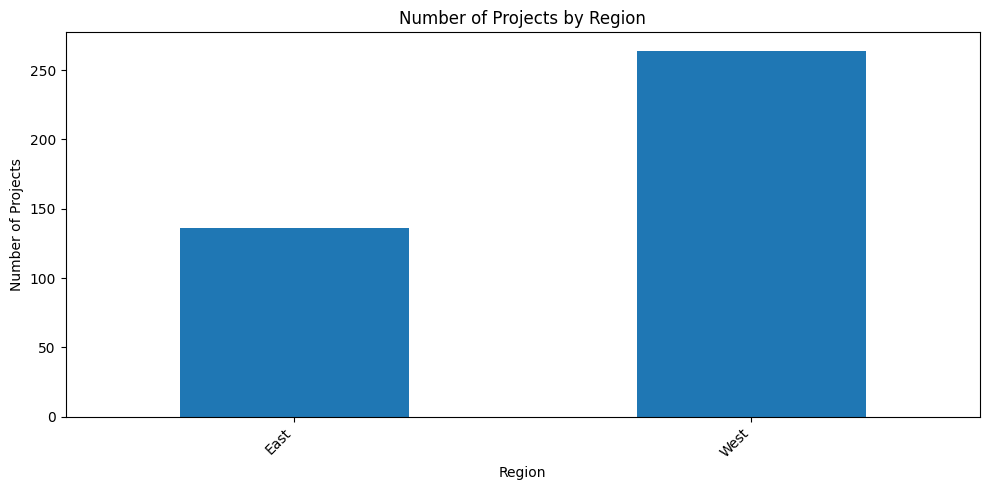

In [ ]:
import matplotlib.pyplot as plt

# create a subset based on a single record per project
project_df = df.drop_duplicates(subset='Project')

# Group by region and count the number of projects
project_counts_by_region = project_df.groupby('Region')['Project'].count()

# Create a bar chart
project_counts_by_region.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Number of Projects by Region')
plt.xlabel('Region')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

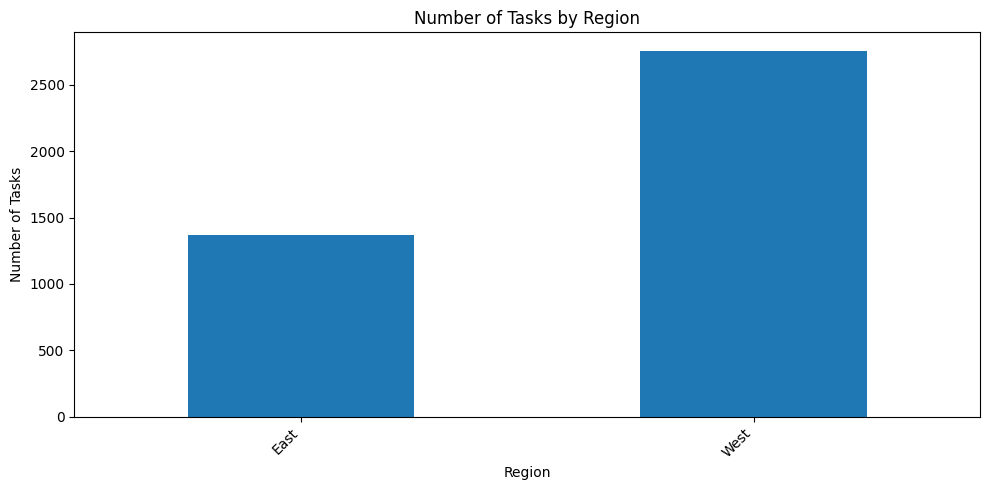

In [ ]:
# Group by region and count the number of tasks
task_counts_by_region = df.groupby('Region')['Task'].count()

# Create a bar chart
task_counts_by_region.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Number of Tasks by Region')
plt.xlabel('Region')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

Let's also look at the individual tasks by region:

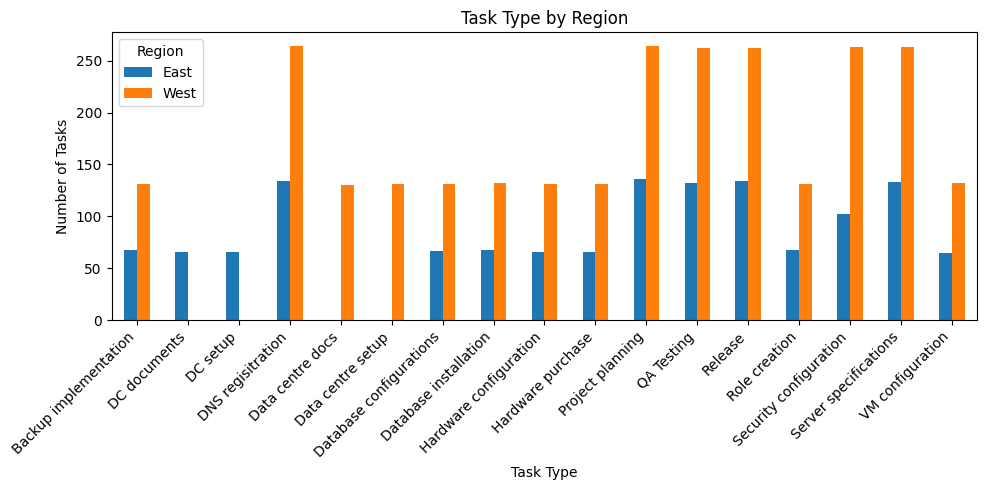

In [ ]:
# Group by region and task name, then count the number of tasks
task_names_by_region_task = df.groupby(['Task', 'Region'])['Region'].count().unstack()

# Create a grouped bar chart
task_names_by_region_task.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Task Type by Region')
plt.xlabel('Task Type')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Region')

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

Interesting results here. Some tasks seem to occur in one region and not in the other. We can guess that "DC setup" (East) is "Data centre setup" (West) but needs checking. "Security configuration" seems unusually low in the East.

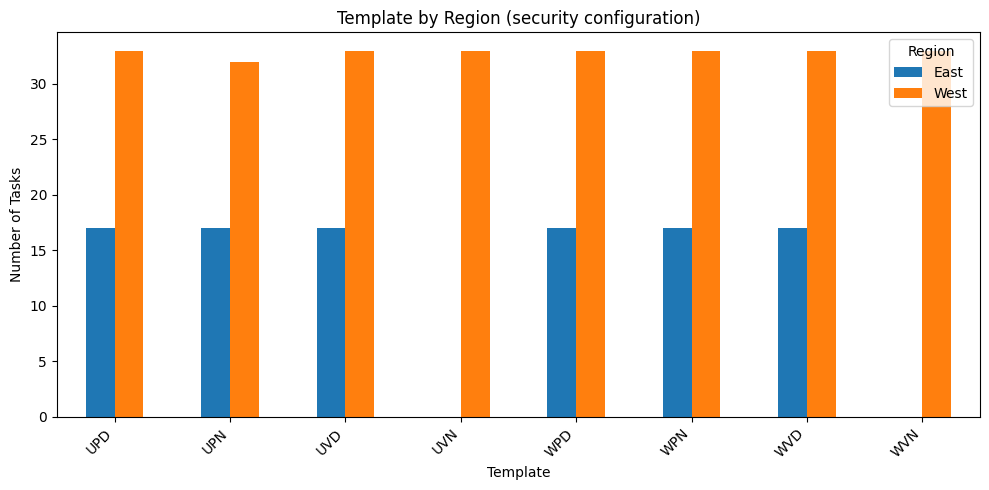

In [ ]:
# get just "Security config" tasks
sec_df = df[df['Task'] == 'Security configuration']

# Group by region and task name, then count the number of tasks
sec_by_region_template = sec_df.groupby(['Template', 'Region'])['Region'].count().unstack()

# Create a grouped bar chart
sec_by_region_template.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Template by Region (security configuration)')
plt.xlabel('Template')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Region')

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

So the issue seems to be for "Virtual" + "No database" tempaltes. We'll check this with the business.

Next we can check the team names by region:

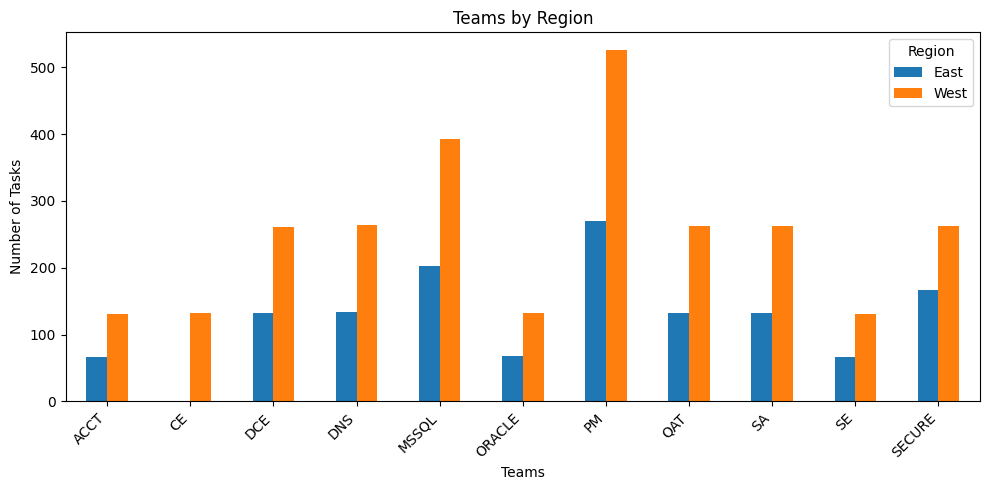

In [ ]:
# Group by region and team name, then count the number by region
team_names_by_region_task = df.groupby(['Team', 'Region'])['Region'].count().unstack()

# Create a grouped bar chart
team_names_by_region_task.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Teams by Region')
plt.xlabel('Teams')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Region')

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

"CE" seems to be West only. Needs checking.

### By Time
Let's look at some of these by time the project takes. For these we will look at the mean, the max and the min. There's a good case to look at median for such things, or the standard deviation, but we'll keep it simple for now:

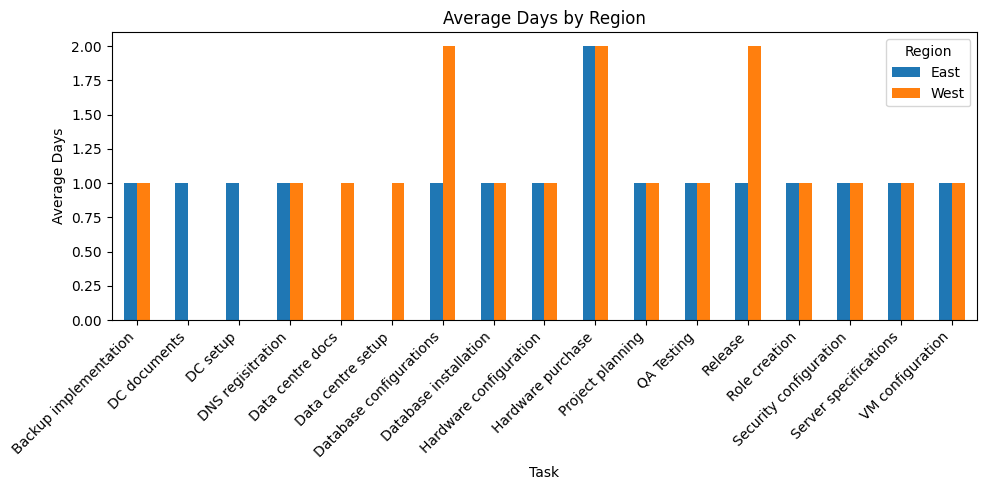

In [ ]:
# Group by region and count the average length of task
days_by_region = df.groupby(['Region', 'Task'])['s1_to_s4'].mean()

# Remove the first level ('Region') from the index
days_by_region = days_by_region.unstack(level=0)

# Convert Timedelta values to numeric (e.g., days)
days_by_region = days_by_region.apply(lambda x: x.dt.days, axis=1) # Convert Timedelta to days

# Create a bar chart
days_by_region.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Average Days by Region')
plt.xlabel('Task')
plt.ylabel('Average Days')
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

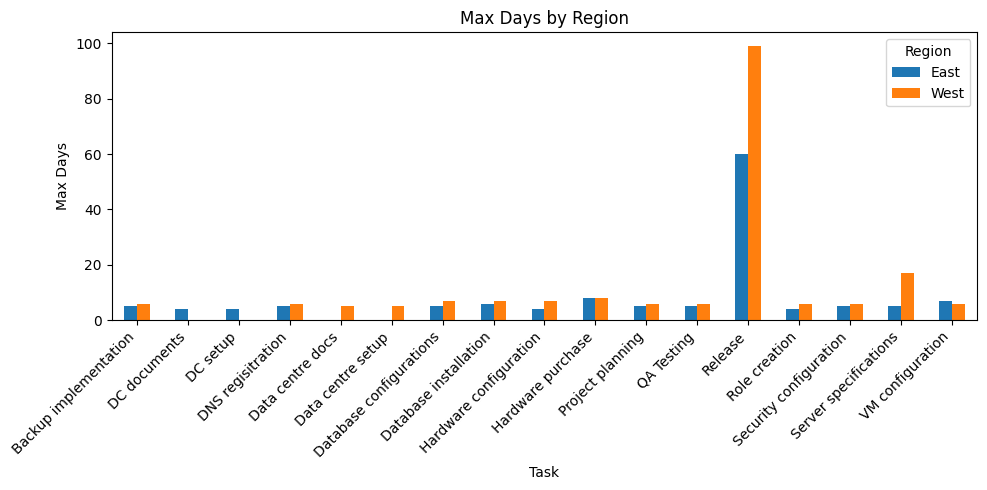

In [ ]:
# Group by region and count the average length of task
days_by_region = df.groupby(['Region', 'Task'])['s1_to_s4'].max()

# Remove the first level ('Region') from the index
days_by_region = days_by_region.unstack(level=0)

# Convert Timedelta values to numeric (e.g., days)
days_by_region = days_by_region.apply(lambda x: x.dt.days, axis=1) # Convert Timedelta to days

# Create a bar chart
days_by_region.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Max Days by Region')
plt.xlabel('Task')
plt.ylabel('Max Days')
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

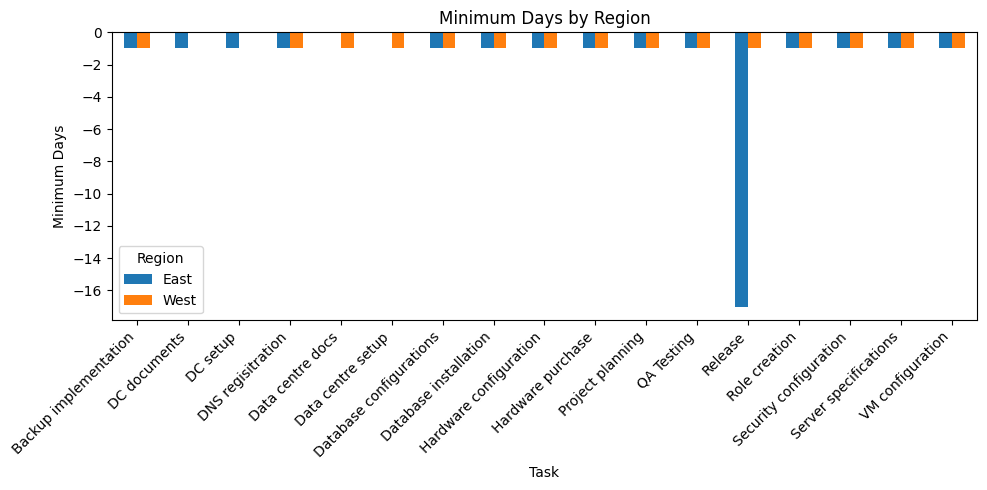

In [ ]:
# Group by region and count the average length of task
days_by_region = df.groupby(['Region', 'Task'])['s1_to_s4'].min()

# Remove the first level ('Region') from the index
days_by_region = days_by_region.unstack(level=0)

# Convert Timedelta values to numeric (e.g., days)
days_by_region = days_by_region.apply(lambda x: x.dt.days, axis=1) # Convert Timedelta to days

# Create a bar chart
days_by_region.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Minimum Days by Region')
plt.xlabel('Task')
plt.ylabel('Minimum Days')
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

The most obvious issue is "Release" which has both some really long tasks (both East and West), and in the East there is one that seems to have taken -17 days. Most tasks have at least one which shows minus days which should not be possible. Will need checking.

Let's also look at Teams:

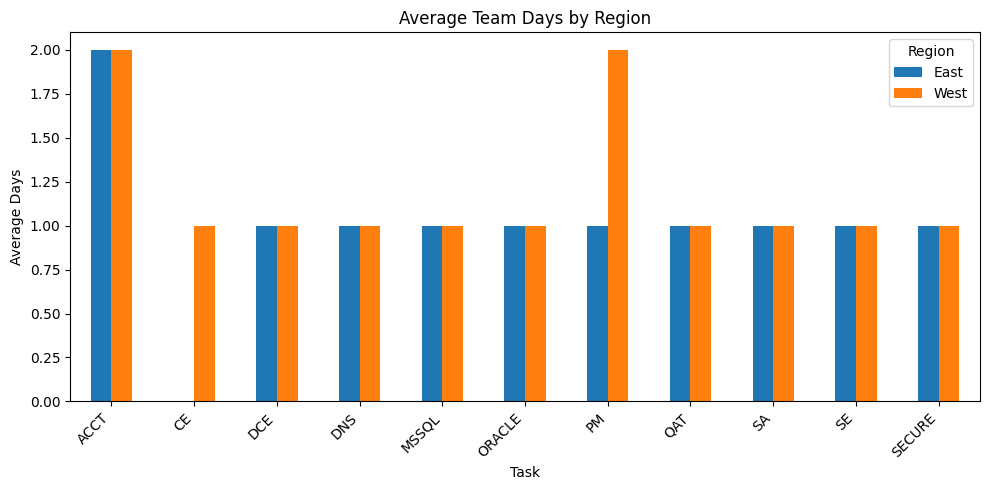

In [ ]:
# Group by region and count the average length of task
teams_by_region = df.groupby(['Region', 'Team'])['s1_to_s4'].mean()

# Remove the first level ('Region') from the index
teams_by_region = teams_by_region.unstack(level=0)

# Convert Timedelta values to numeric (e.g., days)
teams_by_region = teams_by_region.apply(lambda x: x.dt.days, axis=1) # Convert Timedelta to days

# Create a bar chart
teams_by_region.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Average Team Days by Region')
plt.xlabel('Task')
plt.ylabel('Average Days')
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

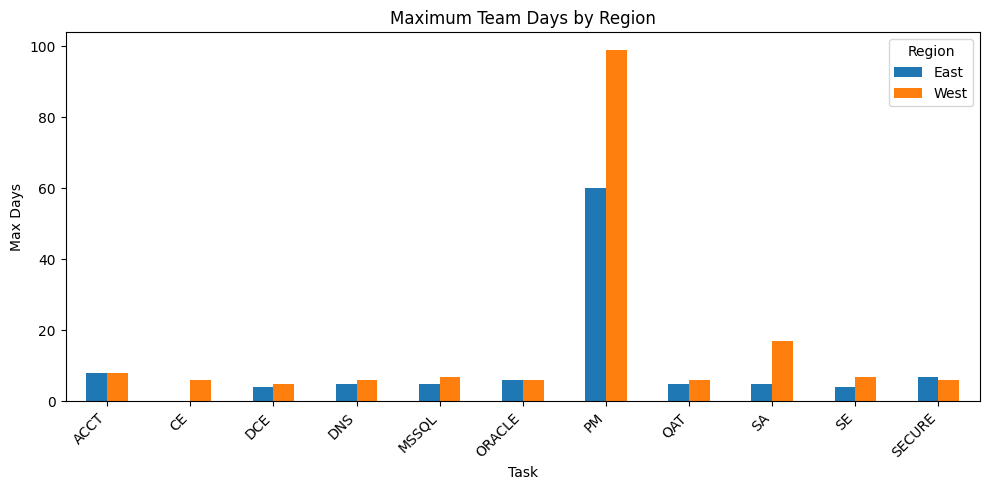

In [ ]:
# Group by region and count the average length of task
teams_by_region = df.groupby(['Region', 'Team'])['s1_to_s4'].max()

# Remove the first level ('Region') from the index
teams_by_region = teams_by_region.unstack(level=0)

# Convert Timedelta values to numeric (e.g., days)
teams_by_region = teams_by_region.apply(lambda x: x.dt.days, axis=1) # Convert Timedelta to days

# Create a bar chart
teams_by_region.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Maximum Team Days by Region')
plt.xlabel('Task')
plt.ylabel('Max Days')
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

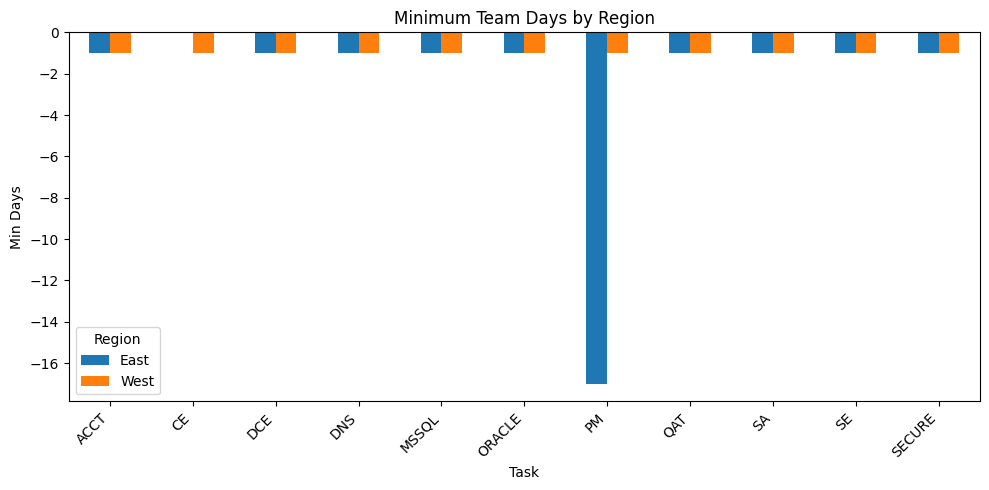

In [ ]:
# Group by region and count the minimum length of task
teams_by_region = df.groupby(['Region', 'Team'])['s1_to_s4'].min()

# Remove the first level ('Region') from the index
teams_by_region = teams_by_region.unstack(level=0)

# Convert Timedelta values to numeric (e.g., days)
teams_by_region = teams_by_region.apply(lambda x: x.dt.days, axis=1) # Convert Timedelta to days

# Create a bar chart
teams_by_region.plot(kind='bar', figsize=(10, 5))

# Customize the chart
plt.title('Minimum Team Days by Region')
plt.xlabel('Task')
plt.ylabel('Min Days')
plt.legend(title='Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

The biggest message is the same as the previous set of charts. "PM" (project management) is responsible for the "Release" tasks which is what we see stand out here for max and min. "ACCT" (accounting) is resonsible for hardware purchase which the spreadsheet tells us is the slowerst task so perhaps not too surprising.

However, overall everything seems to take much longer than the spreadsheet suggets it should. We need to find out why this is as currently the data is highly flawed.

Let's look at this issue at the project level.

### Time by Project

To get here we need to do a bit of aggregating:

In [ ]:
# Group by project and find the minimum length of task
min_project = df.groupby('Project')['Assigned'].min()

# Remove the first level
min_project = min_project.reset_index()

min_project.head()

,Project,Assigned
0,AEP74IBQ3VM,2022-11-01
1,AGD99VBS3QE,2022-06-29
2,AIW73TGC1OF,2022-02-12
3,AMC54OAS7KK,2022-09-11
4,ANH62KVZ4YB,2022-03-01


We now have one row per project with the earliest assigned date in the set. We can make one with the max date and merge them:

In [ ]:
# Group by project and find the maximum length of task
max_project = df.groupby('Project')['Completed'].max()

# Remove the first level/index
max_project = max_project.reset_index()

# here we only need one 'on' rather than 'left_on' + 'right_on' as we have the same field name
merged_project = min_project.merge(max_project, how='inner', on='Project')

merged_project.head()

,Project,Assigned,Completed
0,AEP74IBQ3VM,2022-11-01,2022-11-14
1,AGD99VBS3QE,2022-06-29,2022-08-23
2,AIW73TGC1OF,2022-02-12,2022-02-23
3,AMC54OAS7KK,2022-09-11,2022-09-18
4,ANH62KVZ4YB,2022-03-01,2022-03-13


Now we can get the time delta as before:

In [ ]:
merged_project['time_delta'] = merged_project['Completed'] - merged_project['Assigned']

# Convert Timedelta values to numeric (e.g., days)
merged_project['time_delta'] = merged_project['time_delta'].dt.days # Convert Timedelta to days

merged_project.head()

,Project,Assigned,Completed,time_delta
0,AEP74IBQ3VM,2022-11-01,2022-11-14,13
1,AGD99VBS3QE,2022-06-29,2022-08-23,55
2,AIW73TGC1OF,2022-02-12,2022-02-23,11
3,AMC54OAS7KK,2022-09-11,2022-09-18,7
4,ANH62KVZ4YB,2022-03-01,2022-03-13,12


Already doesn't look great but let's look a bit further:

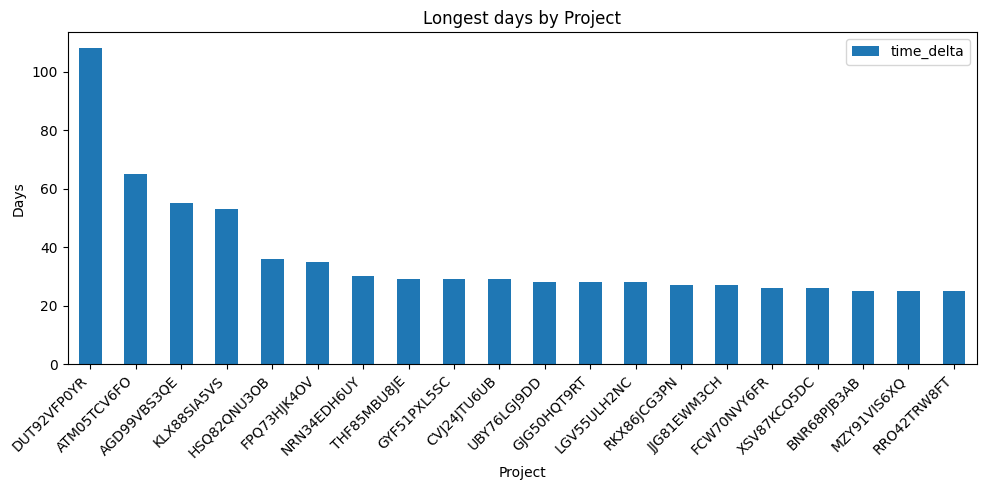

In [ ]:
# sort biggest to smallest
max_projects = merged_project.sort_values(by='time_delta', ascending=False)

# subset the 20 slowest projects
max_projects = max_projects.iloc[:20]

# Create a bar chart
max_projects.plot(kind='bar', x='Project', y='time_delta', figsize=(10, 5))

# Customize the chart
plt.title('Longest days by Project')
plt.xlabel('Project')
plt.ylabel('Days')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()



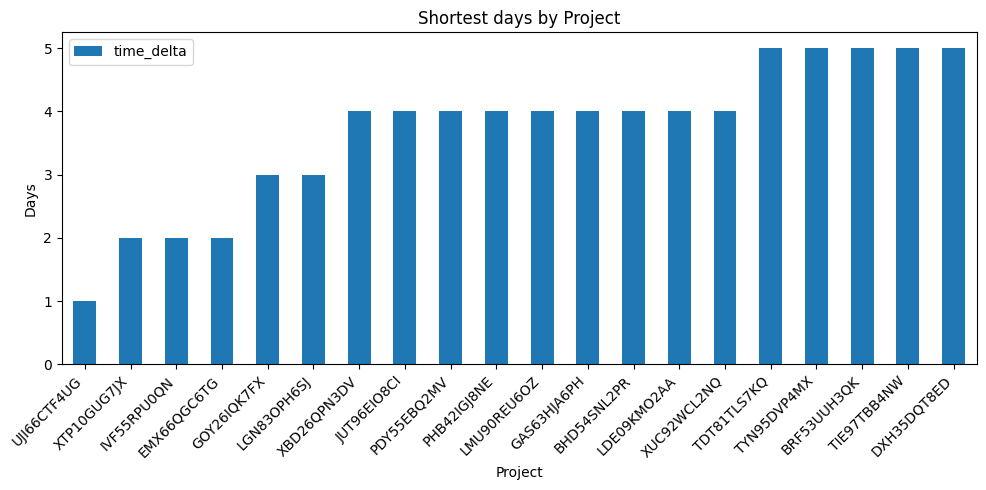

In [ ]:
# sort smallest to biggest
min_projects = merged_project.sort_values(by='time_delta', ascending=True)

# subset the 20 fastest projects
min_projects = min_projects.iloc[:20]

# Create a bar chart
min_projects.plot(kind='bar', x='Project', y='time_delta', figsize=(10, 5))

# Customize the chart
plt.title('Shortest days by Project')
plt.xlabel('Project')
plt.ylabel('Days')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the chart
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

Overall some very obvious issues. We have multiple projects that take over 50 days which is no-where near aligned to the template. Also some projects taking 2 days or fewer which also doesn't make sense.

### CONCLUSIONS
Overall we've seen a process of challenging the data and trying to identify the problems. We do not need to try to be perfect in doing this ... the goal is to expose issues we can discuss with the business, not necessarily to formally "prove" things in the data. (Indeed there were more things we could have done than in this tutorial, and there were more things to be found - however, it is a representative process).

The "solutions" behind the data:

*   there were differences in process between East & West in how things were named and performed;
*   the business description didn't include cases where the project was cancelled, which is some of the very short projects and some of the missing tasks;
*   the business description didn't explain about issues where there were quality issues, and work was sent back to the team that worked on them. This can be seen with situations where the "assigned" date was later than the other dates, because the work would get assigned again (but the teams wouldn't record it then as starting or finishing);
*   several projects took a very long time for the "Release" task because this task means the client approves the solution and it is released to them. Sometimes the client took a long time;
*   the big issue was around how tasks were estiamted. When subject matter experts were asked how long a task took, they would estimate the gap between "started" and "finished" (i.e. the time they actually would work on it). However, this doesn't account for the gap between "assigned" and "accepted" which was quite big potentially. This exposed there was a big issue with how task length were discussed and conceptualised;
*   the real project helped the company find several improvements to how data was documented and stored. We also cleaned up the data substantially before completing the project!







## EXERCISE TWO
Feature engineering the dataset.

In [ ]:
uploaded = files.upload()

In [ ]:
fe_df = pd.read_csv("credit_data.csv")
fe_df.head()

Most of the fields are text, but can be converted. Let's do that refering to the data dictionary:

In [ ]:
fe_df['checking_status'].unique()

Four values that map to the dictionary. We can convert as an oridnal list:

In [ ]:
fe_df['checking_status'] = fe_df['checking_status'].map({'no checking': 0, '<0': 1, '0<=X<200': 2, '>=200': 3})
fe_df['checking_status'].head(10)

This is done slightly differently to the example in the notebook which uses np.where(). Both of these work fine, this gives you more than one option going forward.

Let's look at the next:

In [ ]:
fe_df['credit_history'].unique()

This could be an ordinal list but it doesn't seem perfect. Let's use dummies instead:

In [ ]:
fe_df = pd.get_dummies(fe_df, columns=["credit_history"], prefix=["type_"], dtype='int', drop_first=True)

fe_df.head()

Now we can look at the "purpose" column:

In [ ]:
fe_df["purpose"].unique()

There are too many different items here, this is not going to particularly work. Let's do this:

In [ ]:
fe_df = fe_df.drop('purpose', axis=1)
fe_df.head()

Now we have the main treatment types we can divide the remaining columns with one of these patterns:

*   Ordinal lists: savings_status, employment, housing.
*   Dummies: other_parties, property_magnitude, job other_payment_plans.
*   Binary list: own_telephone, foreign_worker, class.

We can do these all together (well most of them) using loops:

### Ordinal



In [ ]:
fe_df['savings_status'].unique()

In [ ]:
fe_df['savings_status'] = fe_df['savings_status'].map({'no known savings': 0, '<100': 1, '100<=X<500': 2, '500<=X<1000': 3, '>=1000': 4})
fe_df.head()

In [ ]:
fe_df['employment'].unique()

In [ ]:
fe_df['employment'] = fe_df['employment'].map({'unemployed': 0, '<1': 1, '1<=X<4': 2, '4<=X<7': 3, '>=7': 4})
fe_df.head()

In [ ]:
fe_df['housing'].unique()

In [ ]:
fe_df['housing'] = fe_df['housing'].map({'for free': 0, 'rent': 1, 'own': 2})
fe_df.head()

### Dummies

In [ ]:
dummy_list = ['other_parties', 'property_magnitude', 'job', 'other_payment_plans']

for col in dummy_list:
  fe_df = pd.get_dummies(fe_df, columns=[col], prefix=["type_"], dtype='int', drop_first=True)

### Binaries

In [ ]:
import numpy as np

binary_list = ['own_telephone', 'foreign_worker', 'class']

for col in binary_list:
  # create a temporary list for the unique values
  temp_list = fe_df[col].unique()

  # use the temporary list to map the values
  fe_df[col] = np.where(fe_df[col] == temp_list[0], 0, 1)

fe_df.head()

We changed everything apart from personal_status. Let's have a look at it:

In [ ]:
fe_df['personal_status'].unique()

The options look a bit weird. The options for males are separate for divorced and married, but female are the same. Its not obvious what "dep" means for female. All-in-all, it seems problematic (both predictively and also maybe ethically). However, we can keep the gender:

In [ ]:
# split the column based on the space
fe_df[['gender', 'status']] = fe_df['personal_status'].str.split(' ', expand=True)

# drop the new status column and original status column
fe_df = fe_df.drop('status', axis=1)
fe_df = fe_df.drop('personal_status', axis=1)

# convert gender to binary
fe_df['gender'] = np.where(fe_df['gender'] == 'male', 0, 1)

fe_df.head()

Now we can just scale everything and be ready for prediction! We shouldn't scale the target (class) but because its already 1 and 0 it won't change so we can be lazy:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data
normal_data = scaler.fit_transform(fe_df)

# recreate fe_df using the scaled data and original feature names
final_df = pd.DataFrame(normal_data, columns=fe_df.columns)
final_df.head()

And we are good to go! We can end by downloading it:

In [ ]:
final_df.to_csv('credit_data_final.csv', index=False)